<a href="https://colab.research.google.com/github/joynaomi81/Joynaomi81/blob/main/Movie_Reviews_Sentiment_Analysis_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
data.isnull().any()

review       False
sentiment    False
dtype: bool

In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
data.shape

(50000, 2)

Test normalization

Tokenization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import wordcloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn. svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn. metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Tokenization of text
tokenizers=ToktokTokenizer()
#Setting English stopwords
stopsword=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the noisy text
def noiseremoval_text(text):
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()
  text = re.sub('\[[^]]*\]','',text)
  return text

In [ ]:
#Apply function on review column
data['review']=data['review'].apply(noiseremoval_text)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Stemming

In [ ]:
#Stemming the text
def stemmer(text):
  ps=nltk.PorterStemmer()
  text= ''.join([ps.stem(word)for word in text.split()])
  return text

In [ ]:
#Apply function on review column
data['review']=data['review'].apply(stemmer)

In [ ]:
data.head()

,review,sentiment
0,oneoftheotherreviewhamentionthatafterwatchjust...,positive
1,awonderlittlproduction.thefilmtechniquisveriun...,positive
2,ithoughtthiwaawonderwaytospendtimeonatoohotsum...,positive
3,basicthere'afamiliwherealittlboy(jake)thinkthe...,negative
4,"pettermattei'""loveinthetimeofmoney""isavisualst...",positive


Removing stop words

In [ ]:
def removing_stopwords(text, is_lower_case=False):
    tokenizers=ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    tokens = [i.strip() for i in tokens]
    if is_lower_case:
        filtokens = [i for i in tokens if i not in stop_words]
    else:
         filtokens = [i for i in tokens if i.lower() not in stop_words]
    filtered_text = ' '.join(filtokens)
    return filtered_text
    data['text'] = data['text'].apply(removing_stopwords)
      
  

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Apply function on column
data['review']=data['review'].apply(removing_stopwords)

In [ ]:
data.head()

,review,sentiment
0,oneoftheotherreviewhamentionthatafterwatchjust...,positive
1,awonderlittlproduction.thefilmtechniquisveriun...,positive
2,ithoughtthiwaawonderwaytospendtimeonatoohotsum...,positive
3,basicthere ' afamiliwherealittlboy( jake ) thi...,negative
4,"pettermattei ' "" loveinthetimeofmoney "" isavis...",positive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

# Convert categorical variables into numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=["review"])

# Check the data again
print(df.head(5))


  sentiment  \
0  positive   
1  positive   
2  positive   
3  negative   
4  positive   

   review_A Turkish Bath sequence in a film noir located in New York in the 50's, that must be a hint at something ! Something that curiously, in all the previous comments, no one has pointed out , but seems to me essential to the understanding of this movie <br /><br />the Turkish Baths sequence: a back street at night, the entrance of a sleazy sauna, and Scalise wrapped in a sheet, getting his thighs massaged. Steve, the masseur is of the young rough boxer ( Beefcake!) type , and another guy, a bodyguard? finishes dressing up. Dixon obviously hates what he sees there and gets rough right away. We know he has a reputation for roughing up suspects. Good cop but getting out of control easy. Why is it that he hates them so much ? <br /><br />Could it be that he hates himself. This part of himself he inherited from his father ? That dark side that could lead him right at the end of the sidewalk,

In [ ]:
positive_freqs= df[df.sentiment ==1]
positive_freqs.head()

,sentiment,"review_A Turkish Bath sequence in a film noir located in New York in the 50's, that must be a hint at something ! Something that curiously, in all the previous comments, no one has pointed out , but seems to me essential to the understanding of this movie <br /><br />the Turkish Baths sequence: a back street at night, the entrance of a sleazy sauna, and Scalise wrapped in a sheet, getting his thighs massaged. Steve, the masseur is of the young rough boxer ( Beefcake!) type , and another guy, a bodyguard? finishes dressing up. Dixon obviously hates what he sees there and gets rough right away. We know he has a reputation for roughing up suspects. Good cop but getting out of control easy. Why is it that he hates them so much ? <br /><br />Could it be that he hates himself. This part of himself he inherited from his father ? That dark side that could lead him right at the end of the sidewalk, into the gutter ? What if that dark side lurked within a ""closet"" ? Remember : whenever Dixon meets Scalise ( 3 times), the guy is lying on a bed, and he only has men around him for company ( the irony of the "" Girls"" poster pinned up on the wall near his bed !).<br /><br />Scalise acts funny: affected manners, cranking his neck arrogantly, defiant, shoving his inhalator ( poppers ?) into his nostrils each time he talks to Dixon. Dixon, with a vengeance, is bent on pinning down Scalise who seems not to understand : ""I never saw a man so full of hate as you. I consider it almost humorous the way you came after me alone. "" Four years jumping at me as if I was somebody special! Why? ""<br /><br />Because Scalise is someone special indeed : he is the direct inheritor of Dixon's father : "" Your father liked me"", ""Your father set me up in business"". He stands as Dixon's criminal brother, his dark side incarnate. And to top it all, he prefers the company of men. Dixon knows it well :"" Who killed him (Paine)? You or one of your playmates?"" Playmates ! Notice how each time they meet, Dixon manhandles Scalise: he picks the address-book out of his jacket, slaps his face, punches him. Scalise : ""I warn you not to touch me! "" . Dixon's homophobia is obvious. Or put it different : his unexpressed homosexuality . Dixon, aka Dixon's kid, is the son of a thief. In reaction to this, he decided to become a cop, a good one, but there is something of the criminal in him, a dark side: he is a violent copper, a murderer, a liar. Besides, he is not married, brings ""a dizzy blonde"" to his familiar eat-out place every now and then, but nothing else. The waitress scoffing says that he doesn't know how to make love to a woman. Dixon has a deep feeling of guilt and hates himself for those reasons."" A hood and a mobster like his old man. Blood will tell"". Finally, in order to achieve redemption, Dixon decides to sacrifice himself : if he gets his alter ego Scalise to kill him, he will free himself from the guilt and free the girl and her father too.<br /><br />The end of the movie brings us back to the opening sequence : Scalise is pushed in the gutter and Dixon deserves the right to walk the sidewalk and wins the love of the dame. He is straight at last.<br /><br />The unspoken theme of the movie could very well be that of a man who in order to cover his repressed feelings, wants to experience a woman's love ( Jean Douchet)<br /><br />(These notes owe a lot to the film commentary by Jean Douchet in the French DVD edited by CarlottaI","review_!!! Spoiler alert!!!<br /><br />The point is, though, that I didn't think this film had an ending TO spoil... I only started watching it in the middle, after Matt had gotten into Sarah's body, but then I became fascinated by the bizarreness of the plot, even for a Channel 5 movie... and couldn't possibly see how Matt wld end up happy. What about his fiancee? At one stage looked like he was gonna get with his best friend, surely icky and wrong... and then the whole 'oggi oggi oggi' thing does NOT WOR

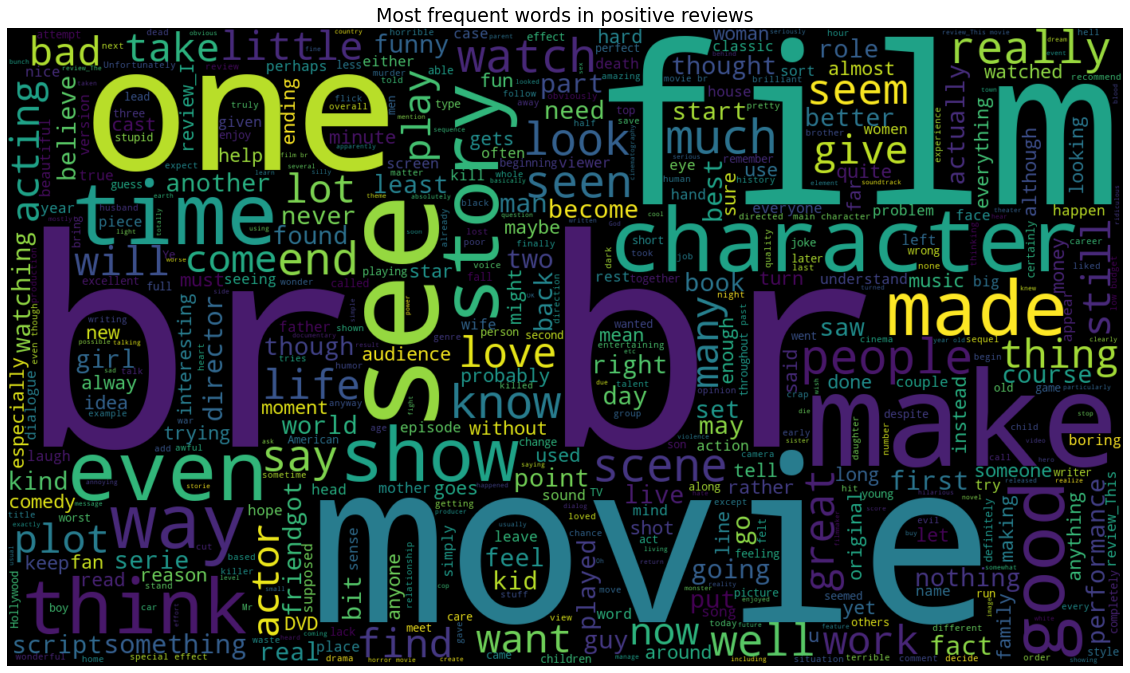

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud image data
wordcloud = WordCloud(max_words=500, width=1400, height=800).generate(text)

# Display word cloud image
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()


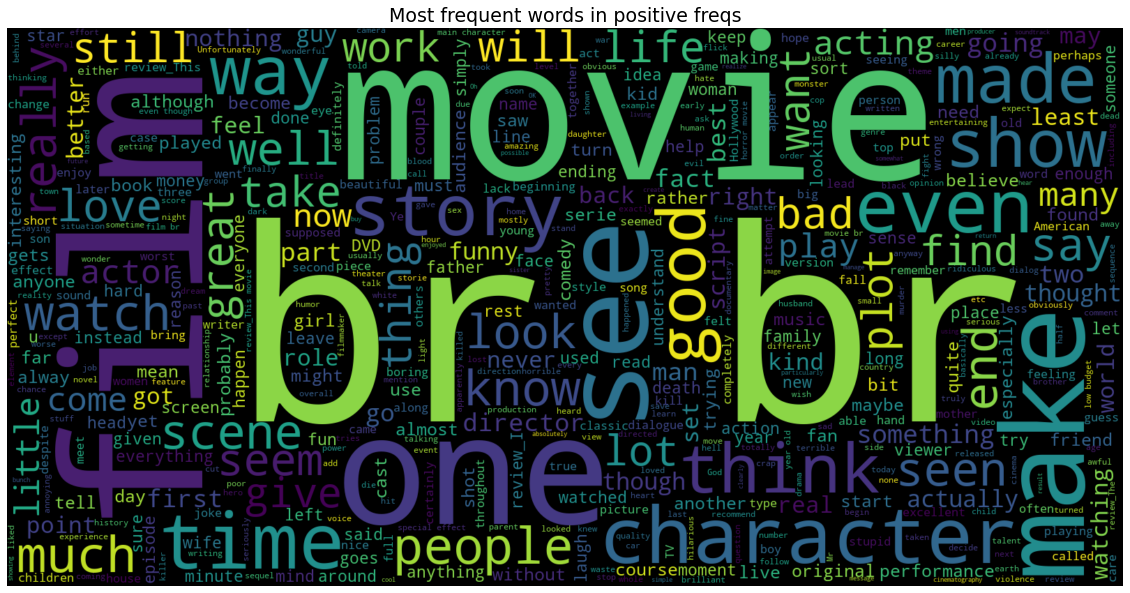

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud image data
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display word cloud image
plt.figure(figsize=(20, 15), facecolor='None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive freqs', fontsize=19)
plt.show()


# Train test split

In [ ]:
#test dataset
train_reviews_data=data.review[:30000]

In [ ]:
test_reviews_data=data.review[30000:]

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=2,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)


BOW_cv_train: (30000, 2774751)
BOW_cv_test: (20000, 2774751)


## **TF_IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(min_df=0,max_df=2,binary=False,ngram_range=(1,3))
tf_train=tf.fit_transform(train_reviews_data)
tf_test=tf.transform(test_reviews_data)
print('BOW_Tfid_train:',tf_train.shape)
print('BOW_Tfid_test:',tf_test.shape)

BOW_Tfid_train: (30000, 2778550)
BOW_Tfid_test: (20000, 2778550)


## **Lable encoding**

In [ ]:
#labeling the sentiment data
label=LabelBinarizer()
#transformed sentiment
sentiment_data=label.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
train_data=data.sentiment[:30000]

In [ ]:
test_data=data.sentiment[30000:]

In [ ]:
sentiment_data

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
train_data=data.sentiment[:30000]

In [ ]:
test_data=data.sentiment[30000:]

In [ ]:
#training the model
logistic=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#fitting the model for bag of words
lr_bow = logistic.fit(cv_train, train_data)
print(lr_bow)
#fitting the model for tfidf features
lr_tfidf=logistic.fit(tf_train,train_data)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=logistic.predict(cv_test)
print(lr_bow_predict)

['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
bow_predict=logistic.predict(cv_test)
print(bow_predict)

['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
bow_score=accuracy_score(test_data,bow_predict)
print('lr_bow_score:',bow_score)

lr_bow_score: 0.6404


In [ ]:
lr_tfidf_predict=logistic.predict(tf_test)
print(lr_tfidf_predict)

['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
lr_bow_score=accuracy_score(test_data,lr_bow_predict)
print('lr_bow_score:',lr_bow_predict)

lr_bow_score: ['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
lr_tfidf_predict=logistic.predict(tf_test)
print(lr_tfidf_predict)

['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
lr_tfidf_score=accuracy_score(test_data,lr_tfidf_predict)
print('lr_tfidf_score:',lr_tfidf_score)

lr_tfidf_score: 0.6405
